In [187]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [188]:
# To find a slope of price line 
def indSlope(series,n):
    
    array_sl = [j*0 for j in range(n-1)]
    
    for j in range(n,len(series)+1):
        y = series[j-n:j]
        x = np.array(range(n))
        x_sc = (x - x.min())/(x.max() - x.min())
        y_sc = (y - y.min())/(y.max() - y.min())
        x_sc = sm.add_constant(x_sc)
        model = sm.OLS(y_sc,x_sc)
        results = model.fit()
        array_sl.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(array_sl))))
    return np.array(slope_angle)

In [189]:
# True Range and Average True Range indicator

def indATR(source_DF,n):
    df = source_DF.copy()
    df['H-L']=abs(df['high']-df['low'])
    df['H-PC']=abs(df['high']-df['close'].shift(1))
    df['L-PC']=abs(df['low']-df['close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df_temp = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df_temp

In [190]:
# generate data frame with all needed data

def PrepareDF(DF):
    ohlc = DF.iloc[:,[0,1,2,3,4,5]]
    ohlc.columns = ["date","open","high","low","close","volume"]
    ohlc=ohlc.set_index('date')
    df = indATR(ohlc,14).reset_index()
    df['slope'] = indSlope(df['close'],5)
    df['channel_max'] = df['high'].rolling(10).max()
    df['channel_min'] = df['low'].rolling(10).min()
    df['position_in_channel'] = (df['close']-df['channel_min']) / (df['channel_max']-df['channel_min'])
    df = df.set_index('date')
    df = df.reset_index()
    return(df)

In [191]:
# find local mimimum / local maximum

def isLCC(DF,i):
    df=DF.copy()
    LCC=0
    
    if df['close'][i]<=df['close'][i+1] and df['close'][i]<=df['close'][i-1] and df['close'][i+1]>df['close'][i-1]:
        #найдено Дно
        LCC = i-1;
    return LCC

def isHCC(DF,i):
    df=DF.copy()
    HCC=0
    if df['close'][i]>=df['close'][i+1] and df['close'][i]>=df['close'][i-1] and df['close'][i+1]<df['close'][i-1]:
        #найдена вершина
        HCC = i;
    return HCC



In [192]:
def getMaxMinChannel(DF, n):
    maxx=0
    minn=DF['low'].max()
    for i in range (1,n):
        if maxx<DF['high'][len(DF)-i]:
            maxx=DF['high'][len(DF)-i]
        if minn>DF['low'][len(DF)-i]:
            minn=DF['low'][len(DF)-i]
    return(maxx,minn)

In [193]:
apiKey='' # добавьте ключ API

interval_var = '5min'
symbol='ETH'

path='https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&symbol='+symbol+'&market=USD&interval='+interval_var+'&apikey='+apiKey+'&datatype=csv&outputsize=full'
df = pd.read_csv('etc.csv', index_col=False)
df['volume'] = df['close'] - df['open']
df = df.drop(['Unnamed: 0'], axis=1)
df

,date,open,high,low,close,volume
0,2022-12-21 00:00:00,1216.32495,1217.52002,1215.87000,1217.15002,0.82507
1,2022-12-21 00:05:00,1217.10998,1218.63000,1216.81006,1217.68994,0.57996
2,2022-12-21 00:10:00,1217.66992,1217.72998,1210.94995,1212.10998,-5.55994
3,2022-12-21 00:15:00,1212.16504,1212.66003,1209.20508,1211.68994,-0.47510
4,2022-12-21 00:20:00,1211.72998,1212.17505,1209.58997,1211.58997,-0.14001
...,...,...,...,...,...,...
570,2022-12-22 23:40:00,1217.59998,1217.88000,1216.87988,1217.30005,-0.29993
571,2022-12-22 23:45:00,1217.30505,1217.72998,1216.46997,1217.69995,0.39490
572,2022-12-22 23:50:00,1217.69495,1217.81995,1216.82007,1217.48999,-0.20496
573,2022-12-22 23:55:00,1217.52002,1217.63000,1216.55005,1217.50000,-0.02002


In [194]:
prepared_df=PrepareDF(df)

In [195]:
prepared_df

,date,open,high,low,close,volume,TR,ATR,slope,channel_max,channel_min,position_in_channel
0,2022-12-21 00:00:00,1216.32495,1217.52002,1215.87000,1217.15002,0.82507,NaN,NaN,0.000000,NaN,NaN,NaN
1,2022-12-21 00:05:00,1217.10998,1218.63000,1216.81006,1217.68994,0.57996,1.81994,NaN,0.000000,NaN,NaN,NaN
2,2022-12-21 00:10:00,1217.66992,1217.72998,1210.94995,1212.10998,-5.55994,6.78003,NaN,0.000000,NaN,NaN,NaN
3,2022-12-21 00:15:00,1212.16504,1212.66003,1209.20508,1211.68994,-0.47510,3.45495,NaN,0.000000,NaN,NaN,NaN
4,2022-12-21 00:20:00,1211.72998,1212.17505,1209.58997,1211.58997,-0.14001,2.58508,NaN,-48.306582,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
570,2022-12-22 23:40:00,1217.59998,1217.88000,1216.87988,1217.30005,-0.29993,1.00012,1.775731,30.748339,1218.14002,1214.47998,0.770503
571,2022-12-22 23:45:00,1217.30505,1217.72998,1216.46997,1217.69995,0.39490,1.26001,1.679653,45.023961,1218.14002,1214.55005,0.877417
572,2022-12-22 23:50:00,1217.69495,1217.81995,1216.82007,1217.48999,-0.20496,0.99988,1.658927,35.902324,1218.14002,1214.55005,0.818932
573,2022-12-22 23:55:00,1217.52002,1217.63000,1216.55005,1217.50000,-0.02002,1.07995,1.579991,0.573082,1218.14002,1214.55005,0.821720


In [196]:
lend=len(prepared_df)

In [197]:
lend

575

In [198]:
prepared_df['hcc']=[None]*lend
prepared_df['lcc']=[None]*lend


In [199]:
prepared_df

,date,open,high,low,close,volume,TR,ATR,slope,channel_max,channel_min,position_in_channel,hcc,lcc
0,2022-12-21 00:00:00,1216.32495,1217.52002,1215.87000,1217.15002,0.82507,NaN,NaN,0.000000,NaN,NaN,NaN,None,None
1,2022-12-21 00:05:00,1217.10998,1218.63000,1216.81006,1217.68994,0.57996,1.81994,NaN,0.000000,NaN,NaN,NaN,None,None
2,2022-12-21 00:10:00,1217.66992,1217.72998,1210.94995,1212.10998,-5.55994,6.78003,NaN,0.000000,NaN,NaN,NaN,None,None
3,2022-12-21 00:15:00,1212.16504,1212.66003,1209.20508,1211.68994,-0.47510,3.45495,NaN,0.000000,NaN,NaN,NaN,None,None
4,2022-12-21 00:20:00,1211.72998,1212.17505,1209.58997,1211.58997,-0.14001,2.58508,NaN,-48.306582,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2022-12-22 23:40:00,1217.59998,1217.88000,1216.87988,1217.30005,-0.29993,1.00012,1.775731,30.748339,1218.14002,1214.47998,0.770503,None,None
571,2022-12-22 23:45:00,1217.30505,1217.72998,1216.46997,1217.69995,0.39490,1.26001,1.679653,45.023961,1218.14002,1214.55005,0.877417,None,None
572,2022-12-22 23:50:00,1217.69495,1217.81995,1216.82007,1217.48999,-0.20496,0.99988,1.658927,35.902324,1218.14002,1214.55005,0.818932,None,None
573,2022-12-22 23:55:00,1217.52002,1217.63000,1216.55005,1217.50000,-0.02002,1.07995,1.579991,0.573082,1218.14002,1214.55005,0.821720,None,None


<AxesSubplot:>

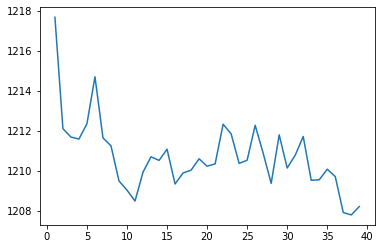

In [209]:
prepared_df[1:40]['close'].plot()

In [210]:
for i in range(4,lend-1):
    if isHCC(prepared_df,i)>0:
#         print(i)
        prepared_df.at[i,'hcc']=prepared_df['close'][i]
    if isLCC(prepared_df,i)>0:
        prepared_df.at[i,'lcc']=prepared_df['close'][i]
        

In [213]:
prepared_df

,date,open,high,low,close,volume,TR,ATR,slope,channel_max,channel_min,position_in_channel,hcc,lcc
0,2022-12-21 00:00:00,1216.32495,1217.52002,1215.87000,1217.15002,0.82507,NaN,NaN,0.000000,NaN,NaN,NaN,None,None
1,2022-12-21 00:05:00,1217.10998,1218.63000,1216.81006,1217.68994,0.57996,1.81994,NaN,0.000000,NaN,NaN,NaN,None,None
2,2022-12-21 00:10:00,1217.66992,1217.72998,1210.94995,1212.10998,-5.55994,6.78003,NaN,0.000000,NaN,NaN,NaN,None,None
3,2022-12-21 00:15:00,1212.16504,1212.66003,1209.20508,1211.68994,-0.47510,3.45495,NaN,0.000000,NaN,NaN,NaN,None,None
4,2022-12-21 00:20:00,1211.72998,1212.17505,1209.58997,1211.58997,-0.14001,2.58508,NaN,-48.306582,NaN,NaN,NaN,None,1211.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2022-12-22 23:40:00,1217.59998,1217.88000,1216.87988,1217.30005,-0.29993,1.00012,1.775731,30.748339,1218.14002,1214.47998,0.770503,None,1217.3
571,2022-12-22 23:45:00,1217.30505,1217.72998,1216.46997,1217.69995,0.39490,1.26001,1.679653,45.023961,1218.14002,1214.55005,0.877417,None,None
572,2022-12-22 23:50:00,1217.69495,1217.81995,1216.82007,1217.48999,-0.20496,0.99988,1.658927,35.902324,1218.14002,1214.55005,0.818932,None,None
573,2022-12-22 23:55:00,1217.52002,1217.63000,1216.55005,1217.50000,-0.02002,1.07995,1.579991,0.573082,1218.14002,1214.55005,0.821720,None,None


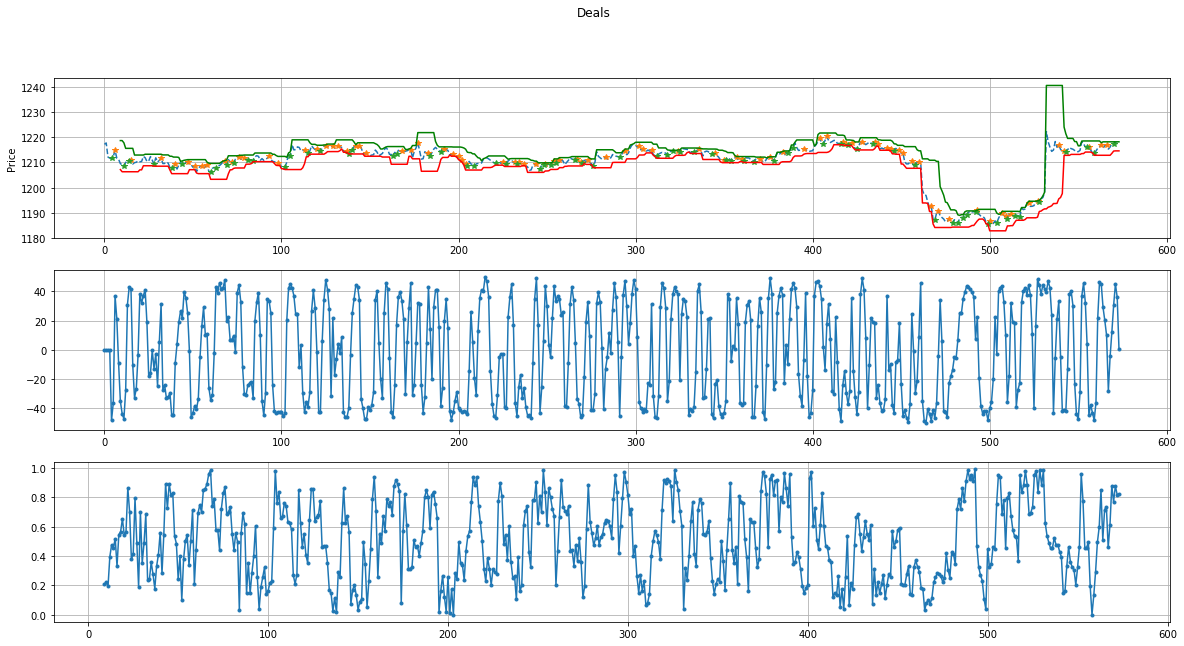

In [214]:
### plot graphs

aa = prepared_df[0:574]
aa=aa.reset_index()

labels = ['close',"hcc","lcc","channel_max","channel_min"]
labels_line = ['--',"*-","*-","g-","r-"]


j=0
x = pd.DataFrame()
y = pd.DataFrame()
for i in labels:
    x[j]=aa['index']
    y[j]=aa[i]
    j=j+1

fig, (ax1, ax2,ax3) = plt.subplots(3, 1)

fig.suptitle('Deals')
fig.set_size_inches(20, 10)

for j in range(0,len(labels)):
    ax1.plot(x[j], y[j], labels_line[j])


ax1.set_ylabel('Price')
ax1.grid(True)

ax2.plot(x[0], aa['slope'], '.-') #EMA
ax3.plot(x[0], aa['position_in_channel'], '.-') #EMA

ax2.grid(True)
ax3.grid(True)

plt.show()